In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math


from scipy.signal import find_peaks
from scipy.integrate import odeint

# Set random seed (for reproducibility)
np.random.seed(1000)

# Start and end time (in milliseconds)
tmin = 0.0
tmax = 1000.0

# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -12.0

# Sodium potential (mV)
VNa = 115.0

# Leak potential (mV)
Vl = 10.613

# Time values
T = np.linspace(tmin, tmax, 10000)

# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)
  
# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
  


In [10]:
def id(n):
    return 5

In [11]:
# Compute derivatives
def compute_derivatives(y, T):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (id(T) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy
  
# State (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])


# Solve ODE system
# Vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])


In [12]:
def Vy1(listv):
    Vm_list = []
    for i in Vy:
        Vm_list.append(i[0])

    return Vm_list

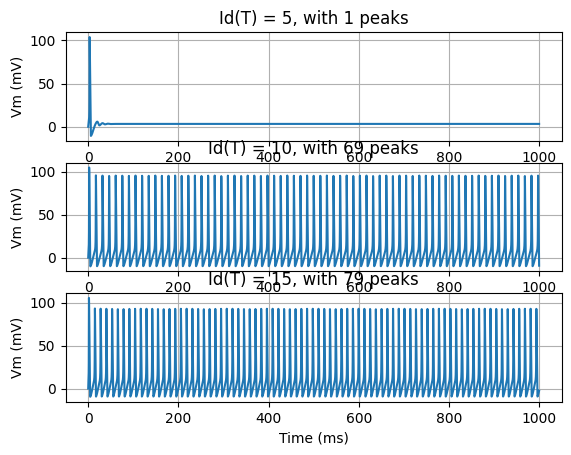

In [13]:
testlist = [5,10,15]

fig, axs = plt.subplots(3)
for i in range(0,len(testlist)):
    def id(n):
        return testlist[i]
    Vy = odeint(compute_derivatives, Y, T)
    spikes, _ = find_peaks(Vy1(Vy), prominence = 5)

    axs[i].plot(T,Vy[:,0])

    axs[i].set_xlabel('Time (ms)')
    axs[i].set_ylabel('Vm (mV)')
    axs[i].set_title(f'Id(T) = {testlist[i]}, with {len(spikes)} peaks')
    axs[i].grid(True)

In [14]:
I_input = np.linspace(5,200,196)

ISI_list = []
peaklist = []
for i in range(0,len(I_input)):
    def id(t):
        return I_input[i]
    Vy = odeint(compute_derivatives, Y, T)

    listV = Vy1(Vy)
    peak_data = find_peaks(listV, prominence = 5)[0]
    peaklist.append(len(peak_data))
    
    #peak_data = peak_data.tolist()
    for k in range(1,len(peak_data)):
        ISI_list.append(peak_data[k] - peak_data[k-1])

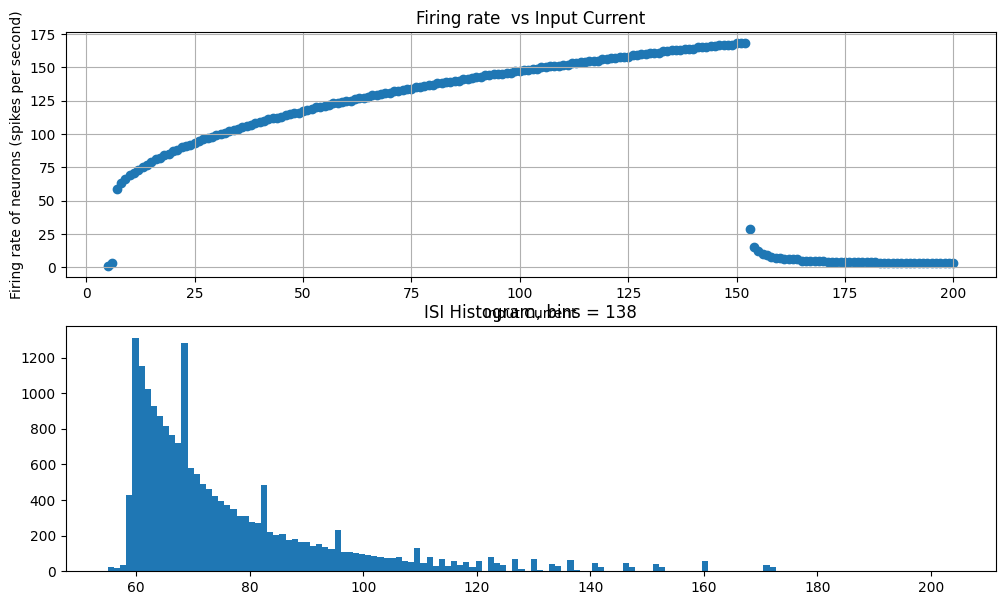

In [17]:
from scipy.stats import poisson
lambda_hat = np.mean(peaklist)

pmf_fit = poisson.pmf(peaklist, lambda_hat)



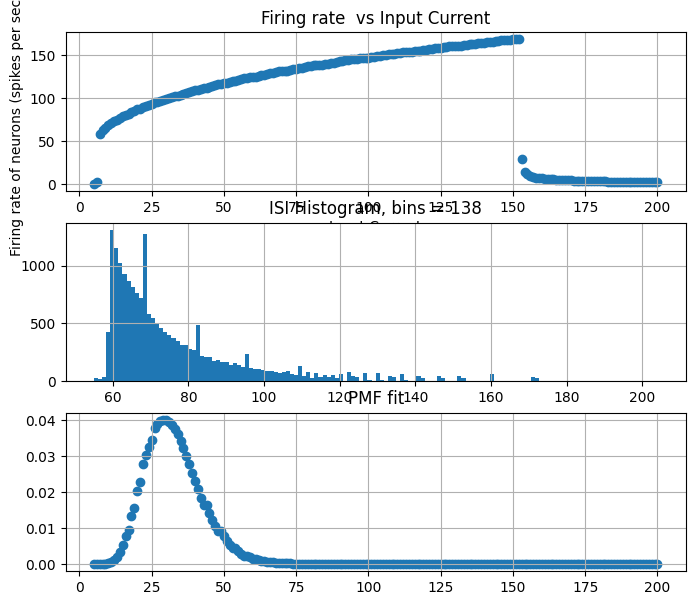

In [19]:
# Neuron potential
fig, axs = plt.subplots(3,1,figsize=(8, 7))
axs[0].scatter(I_input, peaklist)
axs[0].set_xlabel('Input Current')
axs[0].set_ylabel('Firing rate of neurons (spikes per second)')
axs[0].set_title('Firing rate  vs Input Current')
axs[0].grid(True)

bin_num = math.floor(np.sqrt(len(ISI_list)))
axs[1].hist(ISI_list, bins= bin_num )
axs[1].grid(True)
axs[1].set_title(f'ISI Histogram, bins = {bin_num}')
axs[1].grid(True)

axs[2].scatter(I_input, pmf_fit)
axs[2].set_title('PMF fit')
axs[2].grid(True)